torch.Size([20, 1024])


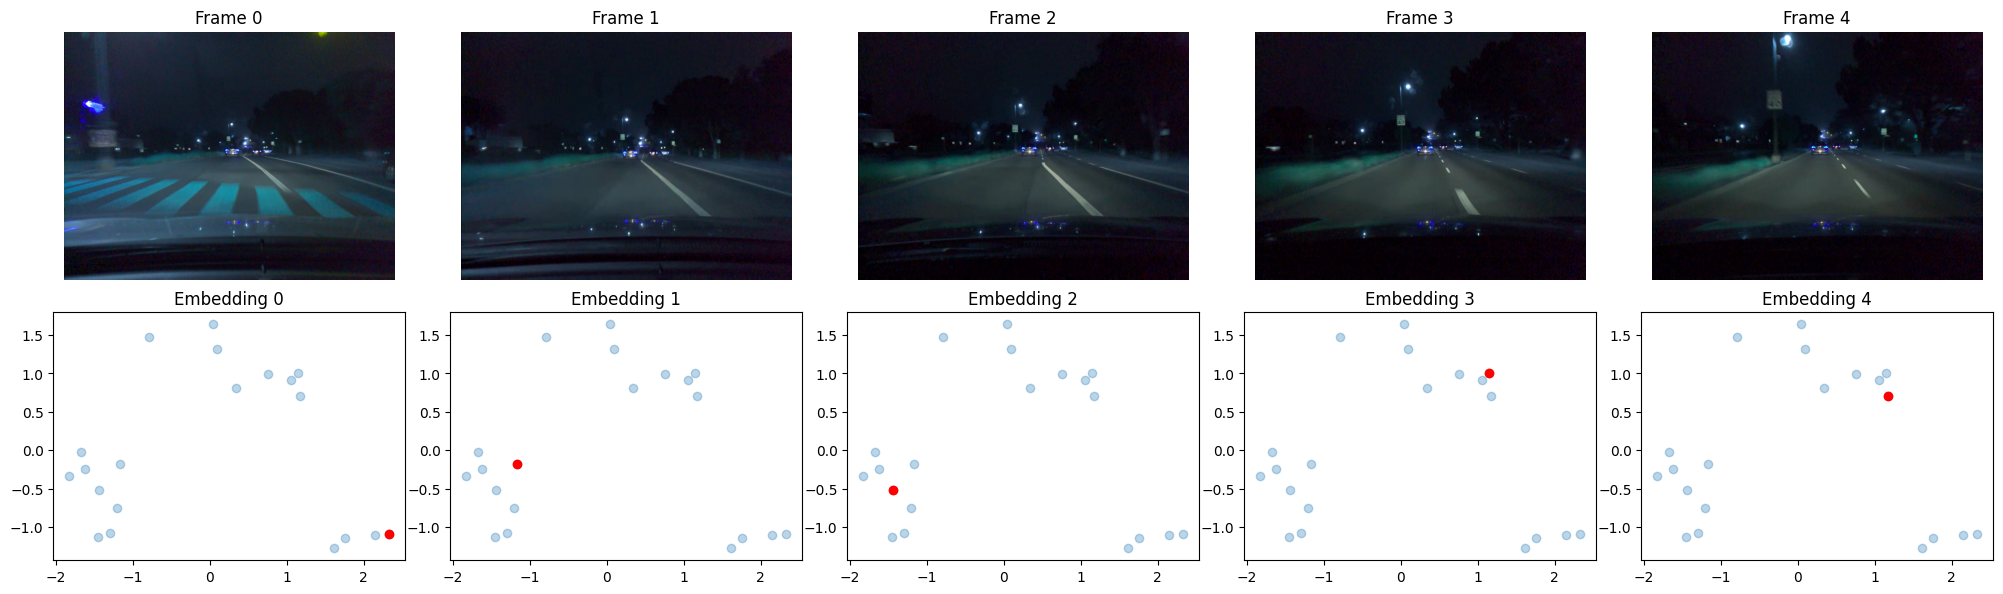

In [ ]:
import matplotlib.pyplot as plt
from safetensors.torch import safe_open
import torch
from sklearn.decomposition import PCA

# === Load the safetensor ===
with safe_open("/deepfreeze/share_read_only/surprise_driving/comma2k19/chunks_embedded/Chunk_1/b0c9d2329ad1606b_2018-07-27--06-03-57/3_chunk_00_embedded.safetensors"
, framework="pt", device="cpu") as f:
    embeddings = f.get_tensor("embedding_data")  # [20, 1024]
    frames = f.get_tensor("frame_data")          # [20, H, W, 3]

print(embeddings.shape)

# Convert embeddings to numpy for PCA
embeddings_np = embeddings.float().numpy()

# Reduce embedding dimensions to 2D for visualization
pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings_np)  # [20, 2]

# === Plot embeddings and corresponding frames ===
num_to_show = embeddings[0] # Number of frames to display

fig, axes = plt.subplots(2, num_to_show, figsize=(4 * num_to_show, 6))

for i in range(num_to_show):
    # Frame
    axes[0, i].imshow(frames[i].numpy().astype("uint8"))
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Frame {i}")

    # Embedding projection
    axes[1, i].scatter(proj[:, 0], proj[:, 1], alpha=0.3, label="All")
    axes[1, i].scatter(proj[i, 0], proj[i, 1], color='red', label="Current")
    axes[1, i].set_title(f"Embedding {i}")
    axes[1, i].axis("equal")

plt.tight_layout()
plt.show()
